In [197]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_rows', None, 'display.max_columns', 500)


In [2]:
df = pd.read_csv('./data/air_walk_merged_clean.csv')

In [3]:
# Already filtered to outside
# #seperating inside and outside monitor readings
# dfout = df[df['location_type'] == 'outside']
# dfin = df[df['location_type'] != 'outside']
dfout = df.copy()

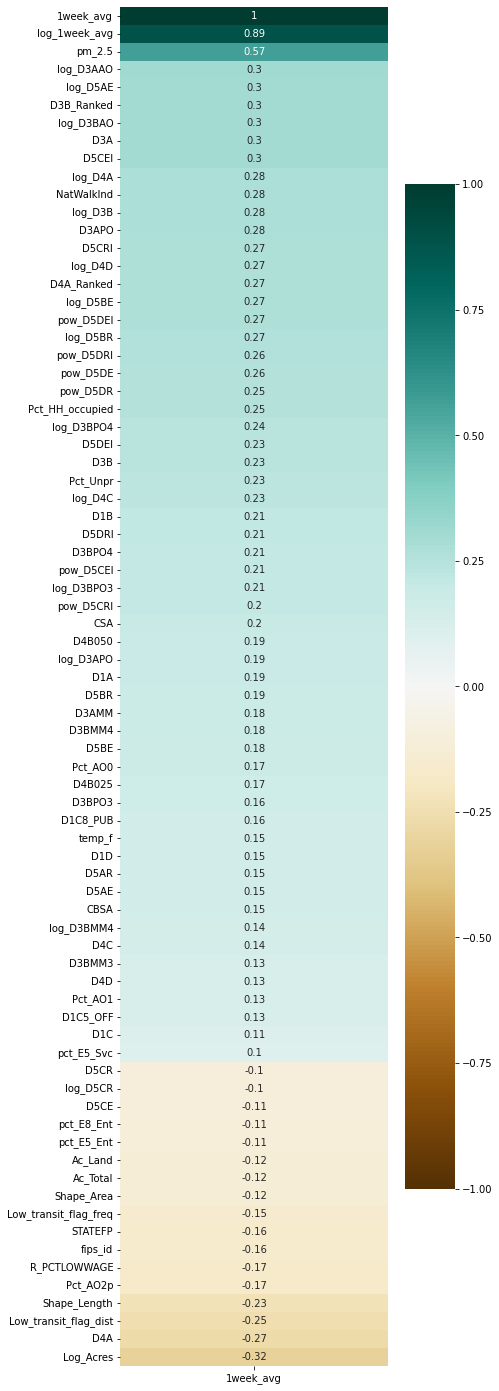

In [4]:
plt.figure(figsize=(6, 25))
col = '1week_avg'
dfcorr = df.corr()[[col]]
heatmap = sns.heatmap(dfcorr[np.abs(dfcorr[col]) > 0.1].sort_values
    (by=col, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


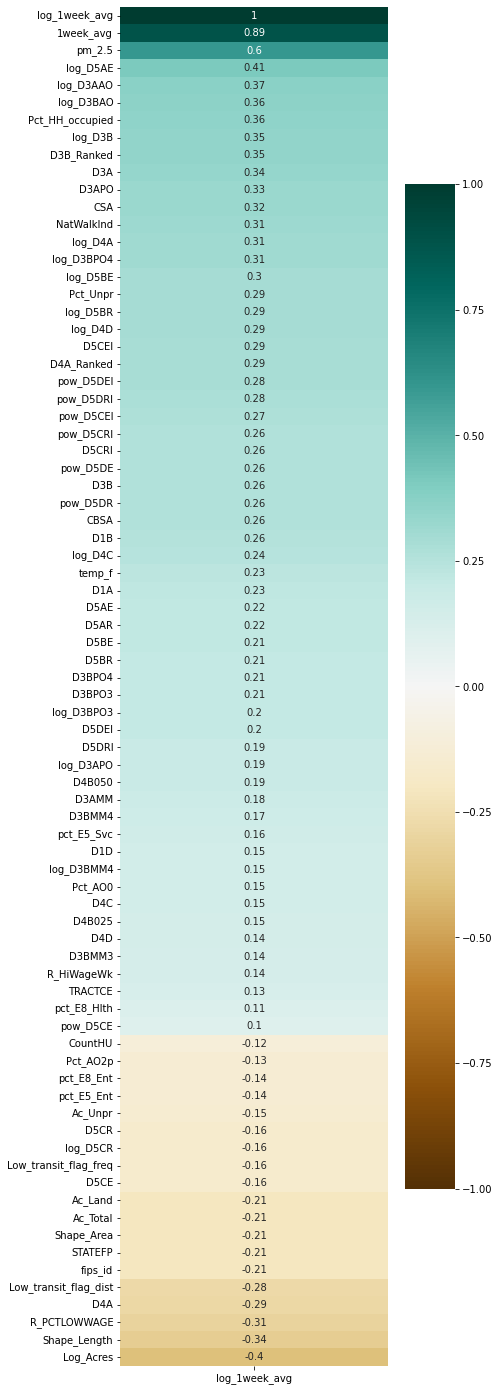

In [5]:
plt.figure(figsize=(6, 25))
col = 'log_1week_avg'
dfcorr = df.corr()[[col]]
heatmap = sns.heatmap(dfcorr[np.abs(dfcorr[col]) > 0.1].sort_values
    (by=col, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


In [6]:
df.columns.get_loc('Shape_Length')

119

In [9]:
target = "log_1week_avg"

### Logged Air Quality by region -- BLKRPCE(7) & LA/SAC

/Users/airtonkamdem/.pyenv/versions/3.9.4/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



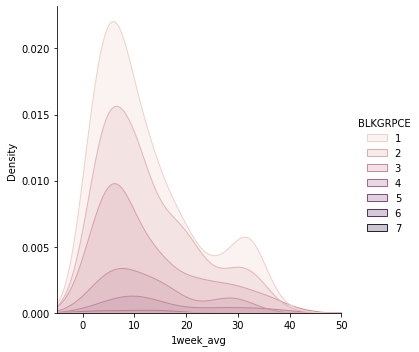

In [187]:
ax = sns.displot(sacla, x="1week_avg", hue="BLKGRPCE", kind="kde", fill=True)
ax.set(xlim=(-5, 50))

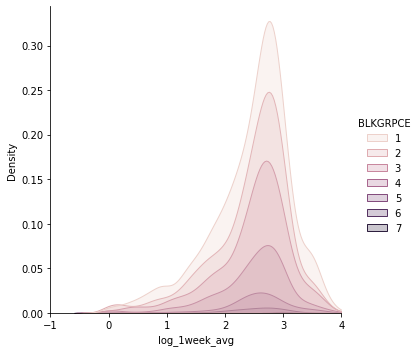

In [185]:
#LOGGED
#visualization by Census block group FIPS code in which CBG resides
ax = sns.displot(df, x=target, hue="BLKGRPCE", kind="kde", fill=True)
ax.set(xlim=(-1, 4))


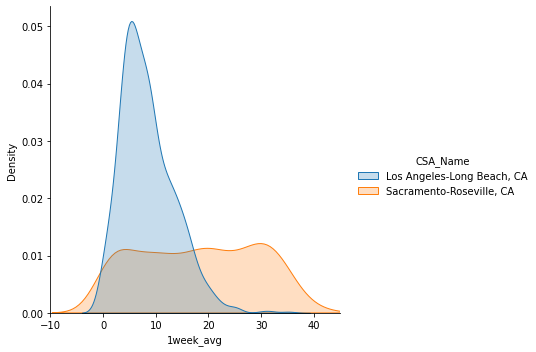

In [186]:
#visualization by Census block group FIPS code in which CBG resides
ax = sns.displot(sacla, x='1week_avg', hue="CSA_Name", kind="kde", fill=True)
ax.set(xlim=(-10, 45))


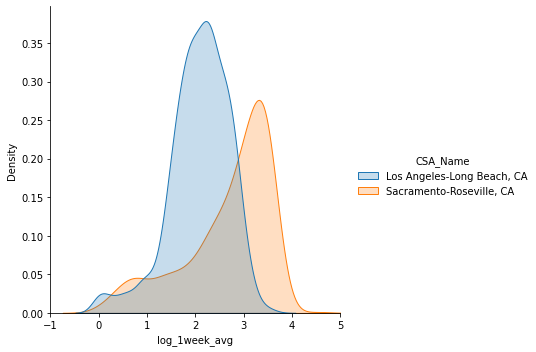

In [125]:
#LOGGED
ax = sns.displot(sacla, x=target, hue="CSA_Name", kind="kde", fill=True)
ax.set(xlim=(-1, 5))


In [126]:
sacla['model'].value_counts()


PMS5003+PMS5003+BME280    1430
PMS5003+BME280+PUB           6
Name: model, dtype: int64

In [14]:
droplist = ['CBSA', 'CSA_Name', 'CSA', 'CBSA_Name', 'COUNTYFP', 'STATEFP',
            'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK',  'is_owner', 'downgraded', 'flagged', 'hidden']

In [15]:
dfout.drop(columns=droplist, inplace=True)

In [127]:
sacla.sample(3)

,name,pm_2.5,temp_f,model,hidden,flagged,downgraded,age,is_owner,1week_avg,fips_id,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,Pct_AO0,Pct_AO1,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Low_transit_flag_dist,Low_transit_flag_freq,Pct_Water,Pct_Land,Pct_Unpr,Log_Acres,log_TotPop,Pct_HH_occupied,log_D2A_JPHH,log_D2A_WRKEMP,Pct_Workers,pct_E5_Ret,pct_E5_Off,pct_E5_Ind,pct_E5_Svc,pct_E5_Ent,pct_E8_Ret,pct_E8_off,pct_E8_Ind,pct_E8_Svc,pct_E8_Ent,pct_E8_Ed,pct_E8_Hlth,pct_E8_Pub,log_D3AAO,log_D3AMM,log_D3APO,log_D3B,log_D3BAO,log_D3BMM3,log_D3BMM4,log_D3BPO3,log_D3BPO4,log_D4A,log_D4C,log_D4D,log_D4E,log_D5AE,log_D5BR,log_D5BE,log_D5CR,pow_D5CRI,pow_D5CE,pow_D5CEI,pow_D5DR,pow_D5DRI,pow_D5DE,pow_D5DEI,pow_D2A_Ranked,log_1week_avg
3042,CHRC,9.67,88.0,PMS5003+PMS5003+BME280,False,False,False,1,False,24.55,60670090101,6,67,9010,1,472.0,"Sacramento-Roseville, CA",40900.0,"Sacramento-Roseville-Folsom, CA",2291738,951760,964523,1048.709203,0.00000,1048.709203,1042.65865,2850,1203.0,1120.0,0.726,0.033036,0.424107,0.542857,1323,246,420,657,0.185941,22129,1022,11388,2039,6799,881,1022,10497,2039,5114,881,182,1503,891,2163,5280,14686,0.097745,1.153781,2.733397,21.223629,0.980187,10.922079,1.955578,6.520830,0.844955,0.980187,10.067533,1.955578,4.904769,0.844955,0.174554,1.441507,0.854546,22.377410,19.758036,0.742198,0.742198,0.737633,0.737633,0.742332,0.632543,0.670469,0.382825,0.228192,0.112826,0.059786,3.905442e-01,14.143108,4.645052,4.624907,4.873150,32.559340,9.764385,11.595207,4.882192,22.580139,4.882192,616.92,0.103391,0.353707,20.00,12.205481,0.007018,93103,77841,27846,15675,0.000891,0.482634,0.000856,0.572701,0.000470,0.054838,0.000465,0.088626,17,17,8,15,13.333333,12133.256850,4244066.376,False,False,0.000000,1.000000,0.994230,6.956268,7.955425,0.931006,3.032933,0.058067,0.464211,0.046184,0.514619,0.092142,0.307244,0.039812,0.046184,0.474355,0.092142,0.231099,0.039812,0.008225,0.067920,0.040264,2.717546,1.730779,1.727204,1.770391,3.513315,2.376243,2.533316,1.771930,3.160405,1.771930,3.044522,2.580632,0.006993,11.262436,10.234481,9.659886,0.000890,0.929741,0.493443,0.945786,0.464777,0.748012,0.464211,0.784795,1.327532,3.240637
1273,AMTS_SCANS_012,31.93,83.0,PMS5003+PMS5003+BME280,False,False,False,0,False,30.20,61130104022,6,113,10402,2,472.0,"Sacramento-Roseville, CA",40900.0,"Sacramento-Roseville-Folsom, CA",2291738,951760,964523,459.626756,0.00000,459.626756,458.53494,2483,768.0,726.0,0.621,0.000000,0.206612,0.793388,1205,191,268,746,0.158506,76,0,4,29,42,1,0,4,29,11,1,0,31,0,25,19,32,0.328947,1.674900,5.415073,0.165745,0.000000,0.008723,0.063245,0.091596,0.002181,0.000000,0.008723,0.063245,0.023989,0.002181,0.000000,0.067607,0.000000,1.840645,0.104683,0.654498,0.563754,0.761205,0.589154,0.248163,0.266167,0.274687,0.009621,0.059398,0.118657,15.855263,3.540000e-07,14.712823,0.319395,3.247244,11.146184,78.006947,1.392434,13.924342,5.569737,77.976313,11.139473,319.19,0.000000,0.000000,2.00,2.784868,0.000805,53792,44270,2488,7147,0.000515,0.278851,0.000487,0.325709,0.000042,0.004900,0.000212,0.040409,4,11,12,17,12.166667,5801.770935,1860084.302,False,False,0.000000,1.000000,0.997625,6.132588,7.817625,0.945312,0.099559,2.824663,0.485300,0.000000,0.052632,0.381579,0.552632,0.

In [111]:
sacla.CSA_Name.value_counts()
#morgan made a cbsa v. walkability and air quality

Los Angeles-Long Beach, CA    820
Sacramento-Roseville, CA      616
Name: CSA_Name, dtype: int64

In [130]:
sacla.dropna(inplace=True)

/Users/airtonkamdem/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [188]:
sacla.CSA_Name.value_counts()

Los Angeles-Long Beach, CA    820
Sacramento-Roseville, CA      616
Name: CSA_Name, dtype: int64

In [109]:
sacla = df[df['CSA_Name'].str.contains("Sacramento") | df['CSA_Name'].str.contains("Angeles")]

In [114]:
'''la = df[df['CSA_Name'].str.contains("Angeles")]
sac = df[df['CSA_Name'].str.contains( "Sacramento")]
sacla = df[sac | la]'''

'la = df[df[\'CSA_Name\'].str.contains("Angeles")]\nsac = df[df[\'CSA_Name\'].str.contains( "Sacramento")]\nsacla = df[sac | la]'

In [190]:
sacla.CSA_Name.sample(10)


1106      Sacramento-Roseville, CA
5115    Los Angeles-Long Beach, CA
4639      Sacramento-Roseville, CA
3674    Los Angeles-Long Beach, CA
2795    Los Angeles-Long Beach, CA
5133      Sacramento-Roseville, CA
2272    Los Angeles-Long Beach, CA
1301      Sacramento-Roseville, CA
5550      Sacramento-Roseville, CA
2809    Los Angeles-Long Beach, CA
Name: CSA_Name, dtype: object

## $ Comparing both regions

<AxesSubplot:xlabel='CSA_Name', ylabel='TotPop'>

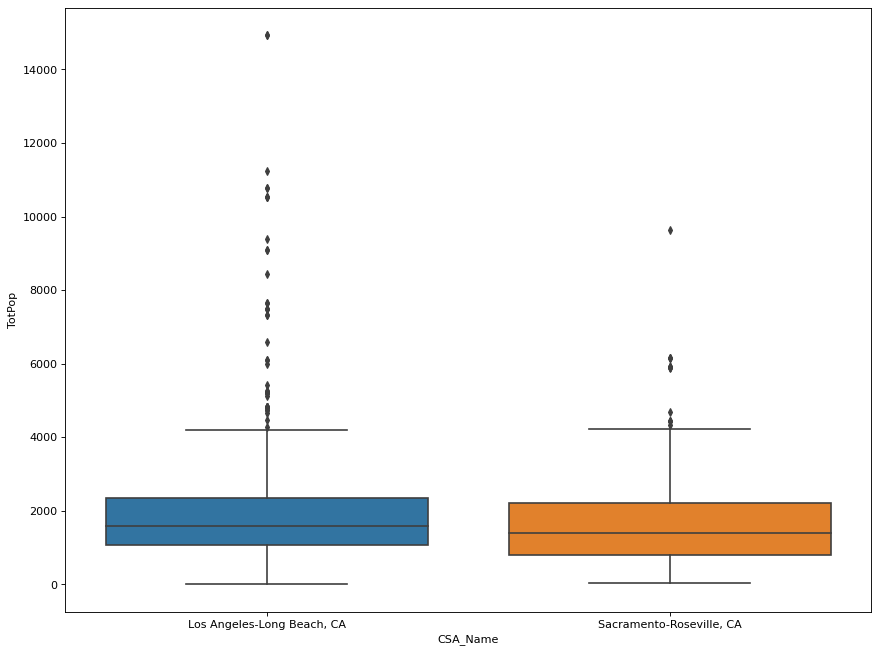

In [309]:
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='CSA_Name', y='TotPop', data=sacla, notch=False)

<AxesSubplot:xlabel='CSA_Name', ylabel='1week_avg'>

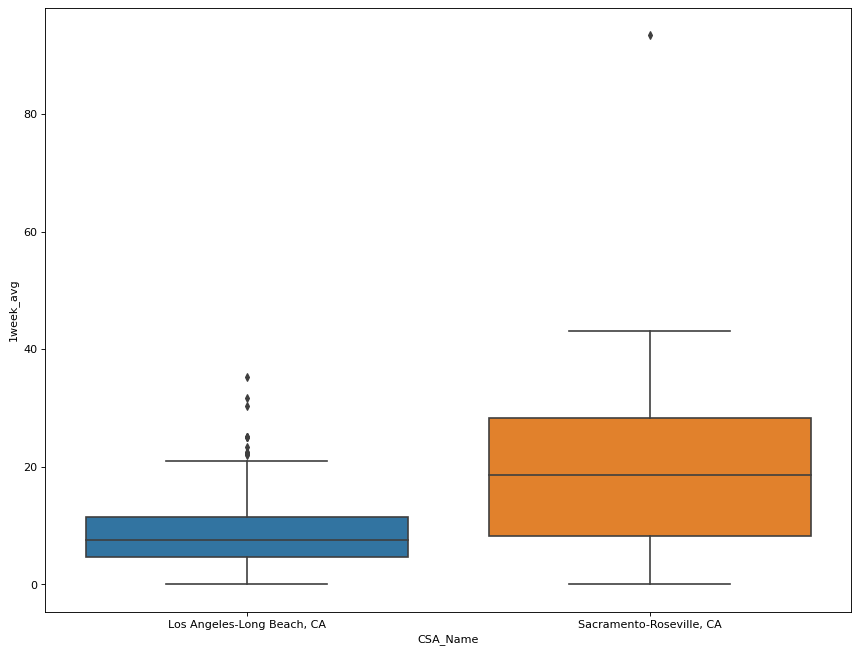

In [311]:
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='CSA_Name', y='1week_avg', data=sacla, notch=False)


<AxesSubplot:xlabel='CSA_Name', ylabel='1week_avg'>

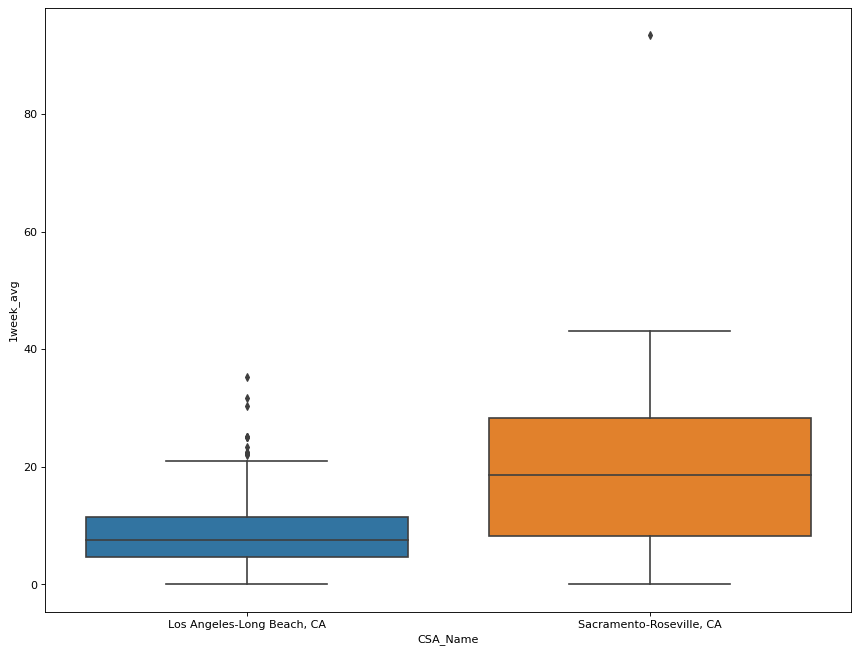

In [312]:
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='CSA_Name', y='1week_avg', data=sacla, notch=False)

<AxesSubplot:xlabel='CSA_Name', ylabel='NatWalkInd'>

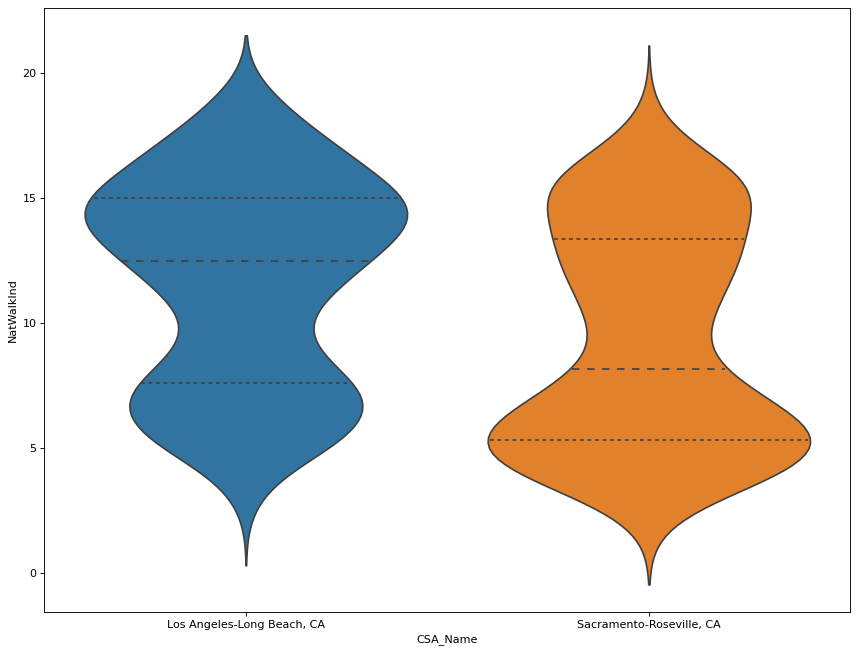

In [314]:
# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)
sns.violinplot(x='CSA_Name', y='NatWalkInd', data=sacla,
               scale='width', inner='quartile')

<AxesSubplot:xlabel='CSA_Name', ylabel='NatWalkInd'>

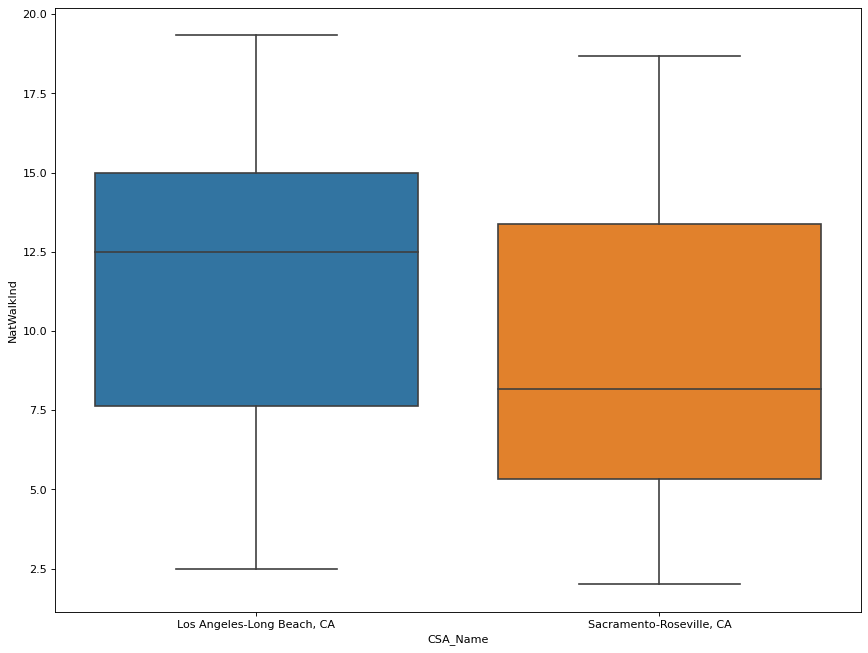

In [313]:

#walkable blocks
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(x='CSA_Name', y='NatWalkInd', data=sacla, notch=False)

### $1 Which metropolitan are and BLKGRPCE has better air quality

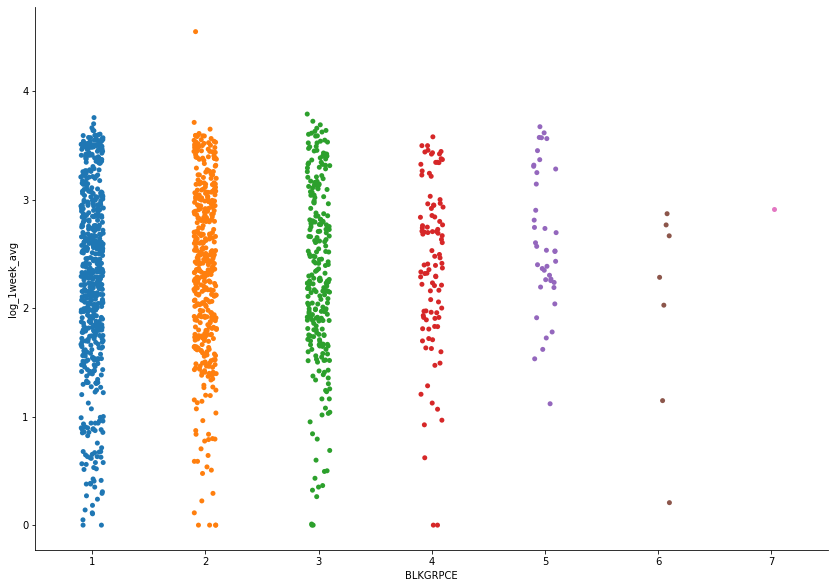

In [195]:
#LOGGED
#df3 = df.sort_values(by=['1week_avg'])
sns.catplot(data=sacla, x='BLKGRPCE', y=target,
            height=8.27, aspect=11.7/8.27)


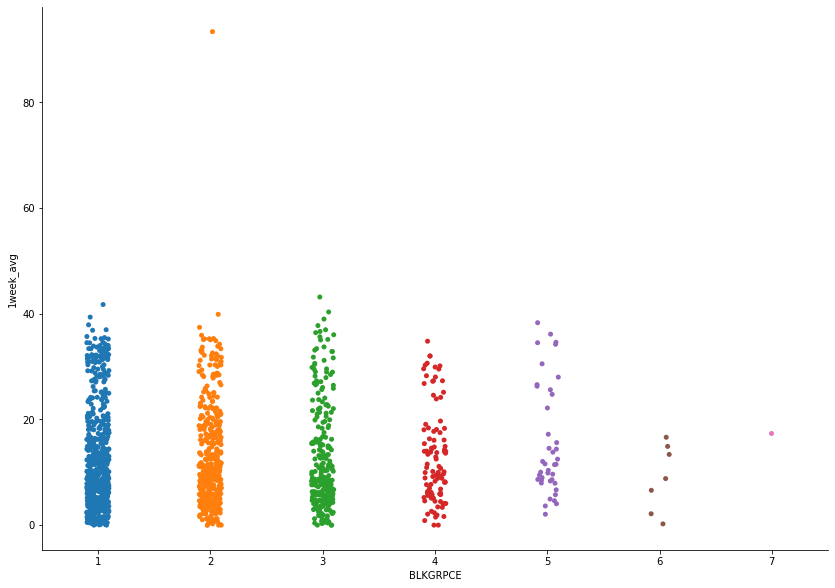

In [194]:
#df3 = df.sort_values(by=['1week_avg'])
sns.catplot(data=sacla, x='BLKGRPCE', y='1week_avg',
            height=8.27, aspect=11.7/8.27)

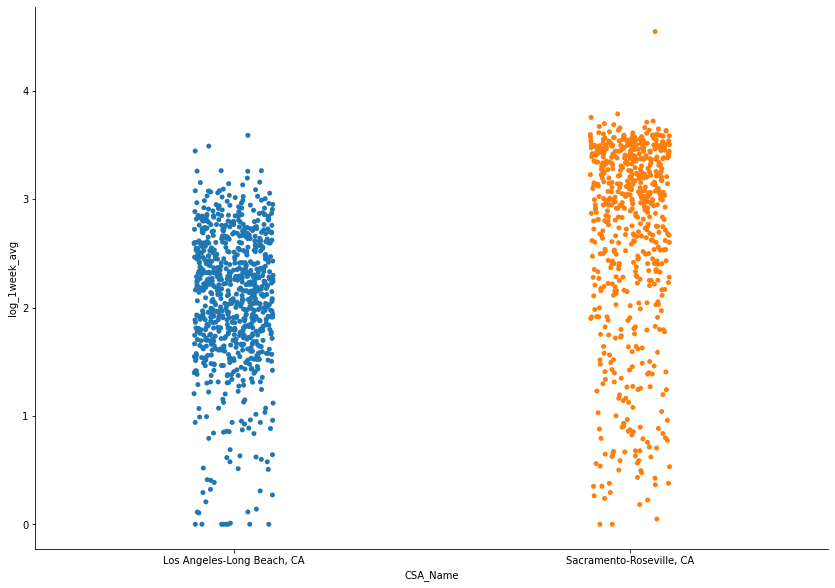

In [192]:
#df3 = df.sort_values(by=['1week_avg'])
sns.catplot(data=sacla, x='CSA_Name', y=target,
            height=8.27, aspect=11.7/8.27)

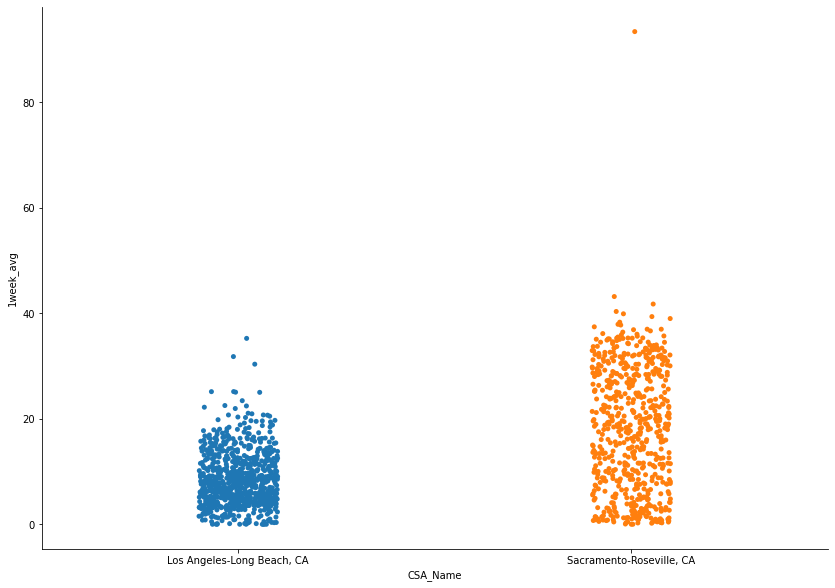

In [211]:
#df3 = df.sort_values(by=['1week_avg'])
sns.catplot(data=sacla, x='CSA_Name', y='1week_avg',
            height=8.27, aspect=11.7/8.27)

## $2 Temperature x AQI -- SIZE: CBSA Population 
### LA is hotter, has more people per CBSA and generally has better air quality, but as Air quality decreases, temperature sees a slight decrease as well

In [280]:
#LOGGED
fig = px.scatter(sacla, x=target, y="temp_f", color="CSA_Name",
                 size='CBSA_POP', hover_data=['HH'], trendline='ols')
fig.show()


In [272]:
fig = px.scatter(sacla, x='1week_avg', y="temp_f", color="CSA_Name",
                 size='CBSA_POP', hover_data=['HH'], trendline='ols')
fig.show()


## $3 Impact of land area: ACRES x AQI -- SIZE: Auto Oriented Intersection Density per square mile
### Sacramento has smaller measured areas, better air quality, and a slightly higher intersection density -- as acres decrease, air quality seems to decrease in both regions

In [279]:
#1 week average and log of acres, size represents CBSA POPulation
fig = px.scatter(sacla, x=target, y="Log_Acres", color="CSA_Name",
                 size='log_D3BAO', hover_data=['HH'], trendline='ols')
fig.show()

## $4 Working age population within 45 minutes auto travel time and AQI on  -- size: total employable population

### LA has more working people within a 45 minute drive of their jobs, better air quality, and larger employable population

In [318]:
#1 week average by the population within a 45 minute auto travel time -- size represents total population
fig = px.scatter(sacla, x=target, y="log_D5AE", color="CSA_Name", size='CBSA_EMP',
                 hover_data=['D4A_Ranked'], trendline='ols')
fig.show()


### $5 impact of wages on AQI

In [317]:
#unprotected land size (not parks etc. )
fig = px.scatter(sacla, x=target, y="R_PCTLOWWAGE", color="CSA_Name", size='CBSA_EMP', trendline='ols',
                 hover_data=['D4A_Ranked'])
fig.show()


In [319]:
#high wage employment (big bubbles )
fig = px.scatter(sacla, x=target, y="R_HiWageWk", log_y=True, color="CSA_Name",
                 size='CBSA_EMP', hover_data=['D4A_Ranked'], trendline="ols")
fig.show()


In [ ]:
Index(['temp_f', 'CBSA_POP', 'CBSA_EMP', 'Ac_Land', 'Pct_AO2p', 'Log_Acres',
       'Pct_HH_occupied', 'pct_E8_Svc', 'log_D5AE', 'pow_D5CE'],
      dtype='object')

### $6 total road network density and AQI -- Sizw: higher wage jobs
#### LA has higher road net work density and sacramento may have higher wage, but there is a strong tend line indicating that better wage jobs are in areas with worst air quality

In [306]:
#road network density - bigger bubbles are higher wages
fig = px.scatter(sacla, x=target, y="D3A", color="CSA_Name",
                 size='R_HiWageWk', hover_data=['D4A_Ranked'], trendline="ols")
fig.show()
